In [2]:
import pandas as pd

df = pd.read_csv("/Users/maitrychauhan/Desktop/stockdata/stocks.csv")

In [3]:
df

,Apr_1_2020,Apr_1_2021,Apr_1_2022,Apr_1_2023,Apr_1_2024,Aug_1_2019,Aug_1_2020,Aug_1_2021,Aug_1_2022,Aug_1_2023,...,change,company_name,last_price,market_cap,pe_ratio_ttm,percent_change,sector_name,symbol,volume,week_52_range
0,36.50,59.35,48.56,34.28,41.05,52.69,36.40,57.39,45.61,36.53,...,-0.19,U.S. Bancorp,40.860,63741599744,13.57,-0.46%,Financial Services,USB,5270006,NaN
1,106.67,186.95,166.10,130.25,155.93,128.93,111.20,191.10,158.00,120.73,...,1.09,"The PNC Financial Services Group, Inc.",157.020,62501343232,13.18,+0.70%,Financial Services,PNC,1354108,NaN
2,172.67,251.44,287.99,325.18,311.02,194.85,199.99,286.86,279.26,333.39,...,1.72,Aon plc,312.740,62064816128,25.02,+0.55%,Financial Services,AON,359142,NaN
3,NaN,NaN,112.71,53.79,225.86,NaN,NaN,259.00,66.80,79.60,...,9.82,"Coinbase Global, Inc.",235.680,57099370496,654.67,+4.35%,Financial Services,COIN,6462560,NaN
4,89.45,117.71,115.81,108.93,131.65,93.48,106.23,119.53,100.85,117.99,...,0.32,"Intercontinental Exchange, Inc.",131.970,75675426816,31.50,+0.24%,Financial Services,ICE,1523363,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,23.94,38.55,30.90,26.62,18.51,23.79,30.03,37.61,33.42,22.45,...,1.39,Atlantica Sustainable Infrastructure plc,19.895,2310983424,53.77,+7.48%,Utilities,AY,2932408,NaN
143,NaN,NaN,9.17,18.06,15.69,NaN,NaN,NaN,19.95,26.35,...,0.62,"Fluence Energy, Inc.",16.305,2912611072,NaN,+3.92%,Utilities,FLNC,1310761,NaN
144,87.88,118.52,125.17,123.50,105.72,94.58,81.80,130.70,126.30,110.10,...,-0.41,Chesapeake Utilities Corporation,105.310,2344979712,22.26,-0.39%,Utilities,CPK,41104,NaN
145,64.66,74.81,77.87,76.61,77.40,75.85,64.99,80.54,77.02,72.43,...,0.69,"MGE Energy, Inc.",78.090,2824975872,24.03,+0.89%,Utilities,MGEE,92594,NaN


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only numeric columns and drop 'Unnamed' columns
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.drop(columns=['week_52_range'], inplace=True)


# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Scale the data for normalization
scaler = StandardScaler()
numeric_data_scaled = pd.DataFrame(scaler.fit_transform(numeric_data_imputed), columns=numeric_data_imputed.columns)

numeric_data_scaled.head()  # Return the first few rows of the scaled data


,Apr_1_2020,Apr_1_2022,Apr_1_2023,Aug_1_2019,Aug_1_2020,Aug_1_2021,Aug_1_2022,Aug_1_2023,Dec_1_2019,Dec_1_2020,...,Sep_1_2019,Sep_1_2020,Sep_1_2021,Sep_1_2022,Sep_1_2023,change,last_price,market_cap,pe_ratio_ttm,volume
0,-0.465881,-0.391642,-0.503887,-0.301687,-4.458030e-01,-0.341547,-0.399874,-0.437075,-0.237017,-0.372099,...,-0.278417,-0.432741,-0.300201,-0.410147,-0.444139,-0.339269,-0.367556,0.530799,-0.341774,1.578023
1,0.513853,0.832228,0.375355,0.594874,3.006507e-01,0.930244,0.798343,0.255487,1.007779,0.536004,...,0.798744,0.313406,1.089116,0.850089,0.318282,0.027694,0.414333,0.511769,-0.348285,-0.042834
2,1.435364,2.101392,2.161231,1.370075,1.186715e+00,1.841072,2.091124,2.004659,1.611445,1.088173,...,1.477018,1.284525,2.008493,2.218328,2.030350,0.208308,1.462506,0.505071,-0.150622,-0.454668
3,0.000000,0.276311,-0.325144,0.000000,1.418148e-16,1.576080,-0.173962,-0.082815,0.000000,0.000000,...,0.000000,0.000000,1.413902,-0.130955,-0.087022,2.530495,0.943805,0.428882,10.361070,2.071642
4,0.273422,0.308590,0.180029,0.177992,2.510534e-01,0.249502,0.189053,0.232950,0.175599,0.237087,...,0.190571,0.214067,0.264706,0.167759,0.209923,-0.193057,0.245718,0.713910,-0.042441,0.027223


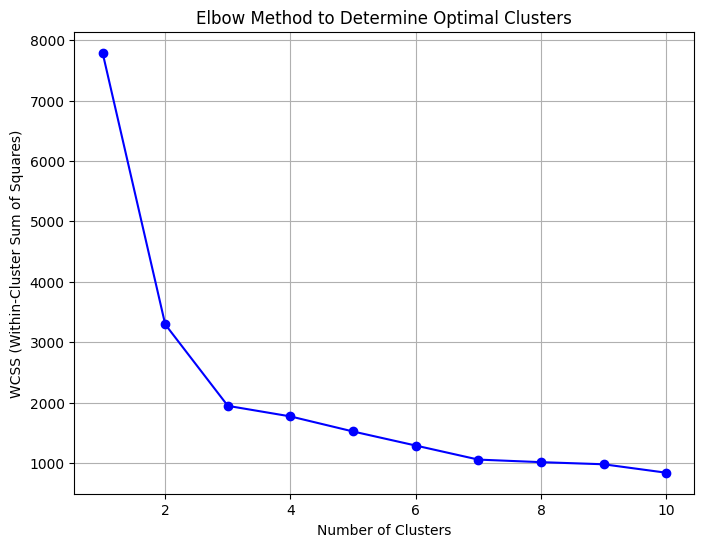

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
cluster_range = range(1, 11)  # Test a range of 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()  # Display the plot to visualize the elbow point


In [16]:
# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)

# Add the cluster labels to the original data
df['cluster'] = clusters

# Display a sample of the data with cluster labels
df.head()  # Show the first few rows with the assigned cluster labels


,Apr_1_2020,Apr_1_2021,Apr_1_2022,Apr_1_2023,Apr_1_2024,Aug_1_2019,Aug_1_2020,Aug_1_2021,Aug_1_2022,Aug_1_2023,...,company_name,last_price,market_cap,pe_ratio_ttm,percent_change,sector_name,symbol,volume,week_52_range,cluster
0,36.50,59.35,48.56,34.28,41.05,52.69,36.40,57.39,45.61,36.53,...,U.S. Bancorp,40.86,63741599744,13.57,-0.46%,Financial Services,USB,5270006,NaN,1
1,106.67,186.95,166.10,130.25,155.93,128.93,111.20,191.10,158.00,120.73,...,"The PNC Financial Services Group, Inc.",157.02,62501343232,13.18,+0.70%,Financial Services,PNC,1354108,NaN,0
2,172.67,251.44,287.99,325.18,311.02,194.85,199.99,286.86,279.26,333.39,...,Aon plc,312.74,62064816128,25.02,+0.55%,Financial Services,AON,359142,NaN,0
3,NaN,NaN,112.71,53.79,225.86,NaN,NaN,259.00,66.80,79.60,...,"Coinbase Global, Inc.",235.68,57099370496,654.67,+4.35%,Financial Services,COIN,6462560,NaN,1
4,89.45,117.71,115.81,108.93,131.65,93.48,106.23,119.53,100.85,117.99,...,"Intercontinental Exchange, Inc.",131.97,75675426816,31.50,+0.24%,Financial Services,ICE,1523363,NaN,1


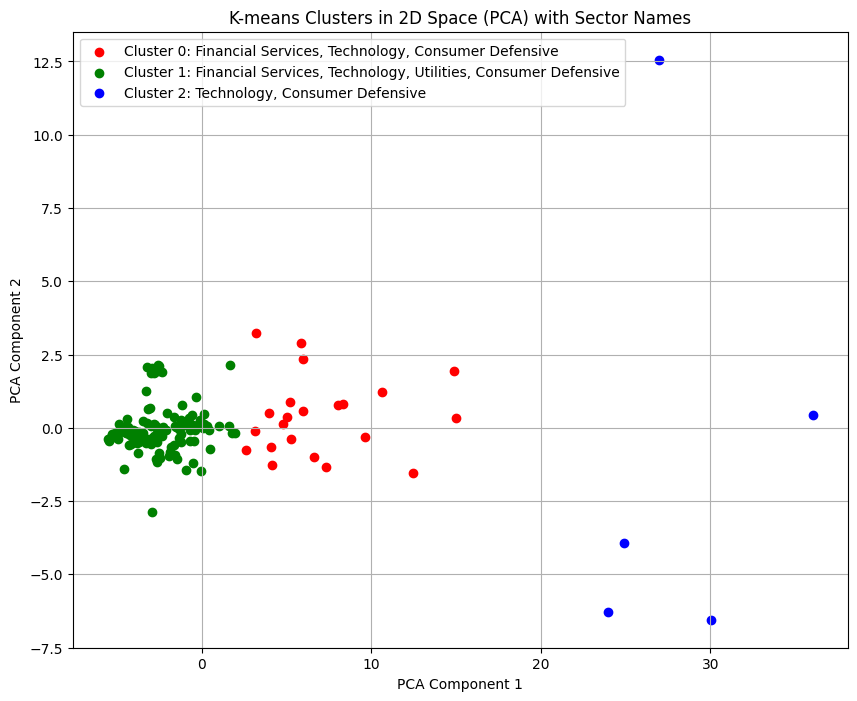

In [19]:
# Reduce dimensions to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data_scaled)

# Create a DataFrame with the PCA results and cluster labels
cluster_plot_data = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
cluster_plot_data['cluster'] = clusters

# Define color mapping for the clusters (red, green, blue)
cluster_colors = {0: 'red', 1: 'green', 2: 'blue'}

# Create scatter plot with cluster colors and sector names
plt.figure(figsize=(10, 8))
for cluster_id in cluster_colors:
    cluster_data = cluster_plot_data[cluster_plot_data['cluster'] == cluster_id]
    sector_names = df.loc[cluster_data.index, 'sector_name'].unique()

    # Scatter plot with the specified color and sector names in the label
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=cluster_colors[cluster_id], label=f'Cluster {cluster_id}: {", ".join(sector_names)}')

plt.title('K-means Clusters in 2D Space (PCA) with Sector Names')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()  # Display the scatter plot with cluster colors and sector labels

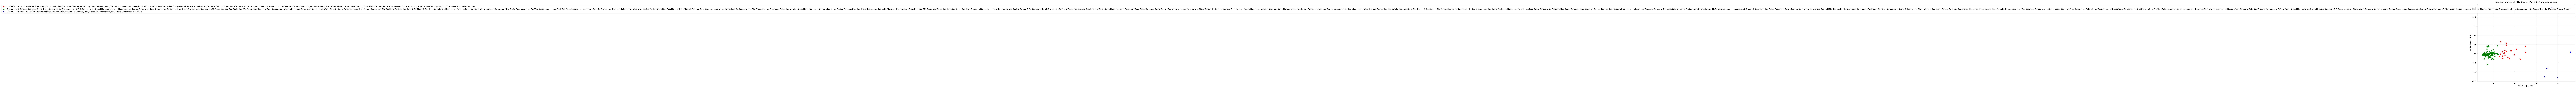

In [21]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data_scaled)

# Create a DataFrame with PCA results and cluster labels
cluster_plot_data = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
cluster_plot_data['cluster'] = clusters

# Define color mapping for clusters (red, green, blue)
cluster_colors = {0: 'red', 1: 'green', 2: 'blue'}

# Create a scatter plot with cluster colors and company names
plt.figure(figsize=(10, 8))
for cluster_id, color in cluster_colors.items():
    cluster_data = cluster_plot_data[cluster_plot_data['cluster'] == cluster_id]
    company_names = df.loc[cluster_data.index, 'company_name'].unique()
    
    # Scatter plot with the specified color and company names in the label
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=color, label=f'Cluster {cluster_id}: {", ".join(company_names)}')

plt.title('K-means Clusters in 2D Space (PCA) with Company Names')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()  # Display the scatter plot with cluster colors and company names